# REPRISE DE TRAITEMENT APRES ABANDON

In [2]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile
#import statsmodels.api as  sm
#import statsmodels.stats.weightstats as stat
#from statsmodels.formula.api import ols
import scipy as sp
from scipy import stats as stat

In [3]:
dataRt = pd.read_excel('DataRt.xlsx' , sep = '\t')
dataRt.shape

(11, 12)

In [4]:
dataRt

,ZS,RT7,RT8,RT9,RT10,RT11,RT12,RT13,RT14,RT15,RT16,RT17
0,BANDUNDU,47,18,27,19,13,23,29,21,28,8,7
1,KONGO CENTRAL,50,41,33,24,20,19,18,20,20,29,23
2,EQUATEUR,69,60,80,67,72,52,44,45,45,29,12
3,KASAI OCCIDENTAL,69,66,51,43,32,38,40,42,23,5,0
4,KASAI ORIENTAL,148,140,139,155,93,97,65,59,79,35,21
5,KATANGA,77,76,110,101,45,63,109,85,89,155,131
6,KINSHASA,146,107,96,89,65,67,92,98,84,0,68
7,MANIEMA,27,16,14,12,17,19,10,15,8,4,0
8,NORD KIVU,53,76,46,45,39,32,40,35,37,40,51
9,SUD KIVU,68,54,50,43,51,56,43,59,43,15,12


In this part we will average the cases per year and show the year that has had more cases.

Note: here we do not take into account the provinces

In [4]:

#Declaration and initialization of variables
moyenne=0
annee=0
c=0
tabMoy = []
tabAnn = [] 

#Method to display the years
def monAnne(year):
    an = year[2:len(year)]
    if int(an)<10:
        an="200" + an
        
    else:
        an="20"+an
    return an

#Loop allowing to browse the columns and calculate the average for each year.
for i in dataRt.columns:
    if i=='ZS':            #if the column is that of Health zone or province
        moyenne=moyenne
    else:
        b=dataRt[i].mean()
        tabAnn.append(monAnne(i))
        tabMoy.append(b)
        if b>moyenne:
            moyenne=b
            annee=i
    c+=1

#display
print("Year ", monAnne(annee), " the highest average of RT is: ",moyenne)

('Year ', '2007', ' the highest average of RT is: ', 83.727272727272734)


In [9]:
#joint table of the year and its case average
tab=[tabAnn,tabMoy]

#transformation of this table into dataframe plus transpose
df=pd.DataFrame(tab).T
df.shape

#nomenclature of columns
df=df.rename(columns={0:'Year',1:'Average'})
print(df)

    Year  Average
0   2007  83.7273
1   2008  70.2727
2   2009  71.1818
3   2010  72.3636
4   2011  53.3636
5   2012  54.2727
6   2013  54.1818
7   2014  54.0909
8   2015  49.7273
9   2016  33.9091
10  2017  35.1818


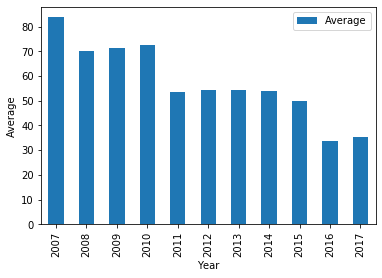

In [10]:
#bar graph of years based on averages
c=df.plot(x=0, y=1, kind='bar')
plt.xlabel('Year')
plt.ylabel('Average')
plt.show()

fig = c.get_figure()
fig.tight_layout()
fig.savefig("PhotoMoyRt.png")

This section presetent which province has had many cases of RT per year, from 2007 to 2017

In [12]:
#Declaration and initialization of variables
maximum=0
annee=0
tabMoy = []
tabAnn = [] 
MaxProv = dict()

#Method to display the years
def monAnne(year):
    an = year[2:len(year)]
    if int(an)<10:
        an="200" + an
        
    else:
        an="20"+an
    return an

for i in dataRt.columns:
    if i=='ZS':
        maximum=maximum
    else:
        b=dataRt[i].max()
        #print(b)
        provIndex=list(dataRt[i]).index(b)
        #print(list(dataNc[i]))
        
        province=dataRt.ZS[provIndex]
        #print(provIndex)
        
        MaxProv[monAnne(i)]=[b,province]
        

for key in MaxProv.keys():
    print('Year: ',key, ' Max: ', MaxProv[key][0], ' Province: ' , MaxProv[key][1])
    print(" ")

Year:  2007  Max:  167  Province:  PROVINCE ORIENTAL
 
Year:  2008  Max:  140  Province:  KASAI ORIENTAL
 
Year:  2009  Max:  139  Province:  KASAI ORIENTAL
 
Year:  2010  Max:  198  Province:  PROVINCE ORIENTAL
 
Year:  2011  Max:  140  Province:  PROVINCE ORIENTAL
 
Year:  2012  Max:  131  Province:  PROVINCE ORIENTAL
 
Year:  2013  Max:  109  Province:  KATANGA
 
Year:  2014  Max:  116  Province:  PROVINCE ORIENTAL
 
Year:  2015  Max:  91  Province:  PROVINCE ORIENTAL
 
Year:  2016  Max:  155  Province:  KATANGA
 
Year:  2017  Max:  131  Province:  KATANGA
 
